In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd

import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
np.random.seed(123)

times = pd.date_range('2000-01-01','2001-12-31', name='time')
annual_cyc = np.sin(2 * np.pi * (times.dayofyear / 365.25 - 0.28))

base = 10 + 15 * annual_cyc.reshape(-1,1)
t_min = base + 3 * np.random.randn(annual_cyc.size, 3)
t_max = base + 10 + 3 * np.random.randn(annual_cyc.size, 3)

ds = xr.Dataset(
                {'tmin': (('time', 'location'), t_min),
                 'tmax': (('time', 'location'), t_max)},
                {'time': times,
                 'location':['IA','IN','IL']}
                )

In [11]:
annual_cyc.reshape(-1,1).shape

(731, 1)

In [12]:
df = ds.to_dataframe()

In [13]:
df.head()

tmax       tmin
location time                            
IA       2000-01-01  12.980549  -8.037369
         2000-01-02   0.447856  -9.341157
         2000-01-03   5.322699 -12.139719
         2000-01-04   1.889425  -7.492914
         2000-01-05   0.791176  -0.447129

In [76]:
df.describe()

,tmin,tmax
count,2193.000000,2193.000000
mean,9.975426,20.108232
std,10.963228,11.010569
min,-13.395763,-3.506234
25%,-0.040347,9.853905
50%,10.060403,19.967409
75%,20.083590,30.045588
max,33.456060,43.271148


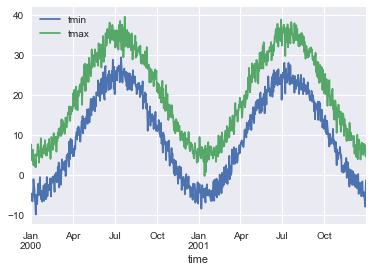

In [79]:
ds.mean(dim='location').to_dataframe().plot()

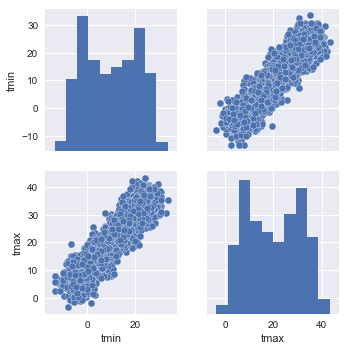

In [80]:
sns.pairplot(df.reset_index(),vars=ds.data_vars)

In [91]:
ds.data_vars['tmin']

<xarray.DataArray 'tmin' (time: 731, location: 3)>
array([[ -8.037369,  -1.788441,  -3.931542],
       [ -9.341157,  -6.558073,   0.132037],
       [-12.139719,  -6.146419,  -1.061873],
       ..., 
       [ -5.347238, -13.374598,  -4.932212],
       [ -2.672836,  -5.180721,  -4.115679],
       [  2.063276,  -1.345764,  -4.543927]])
Coordinates:
  * location  (location) <U2 'IA' 'IN' 'IL'
  * time      (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 ...